In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('crop_data.csv')

In [3]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


#N-P-K in data is nitrogen, phosphorus and potassium 


#They are used to measure nutrients in soil


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
data.label.nunique()

22

#22 unique target classes

In [6]:
data.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


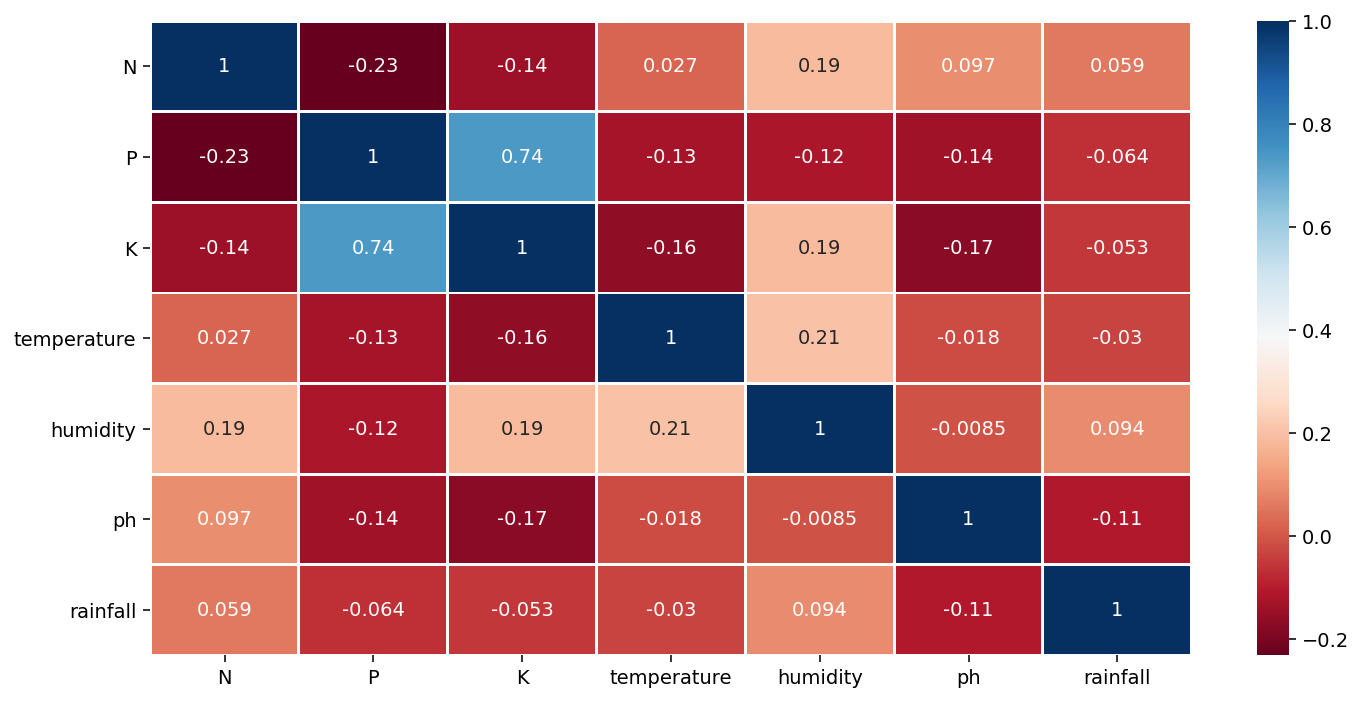

In [7]:
plt.figure(figsize=(12,6),dpi=140)
sns.heatmap(data.corr(),annot=True,cmap='RdBu',linewidths=1)
plt.show()
#features vs features

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
encoder= LabelEncoder()

In [10]:
label_num = encoder.fit_transform(data['label'])

In [11]:
label_num = np.array(label_num)

In [12]:
col = pd.DataFrame(label_num,columns=['label_num'])

In [13]:
data = pd.concat([data,col],axis=1)
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label,label_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20


In [14]:
encoder.classes_

array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)

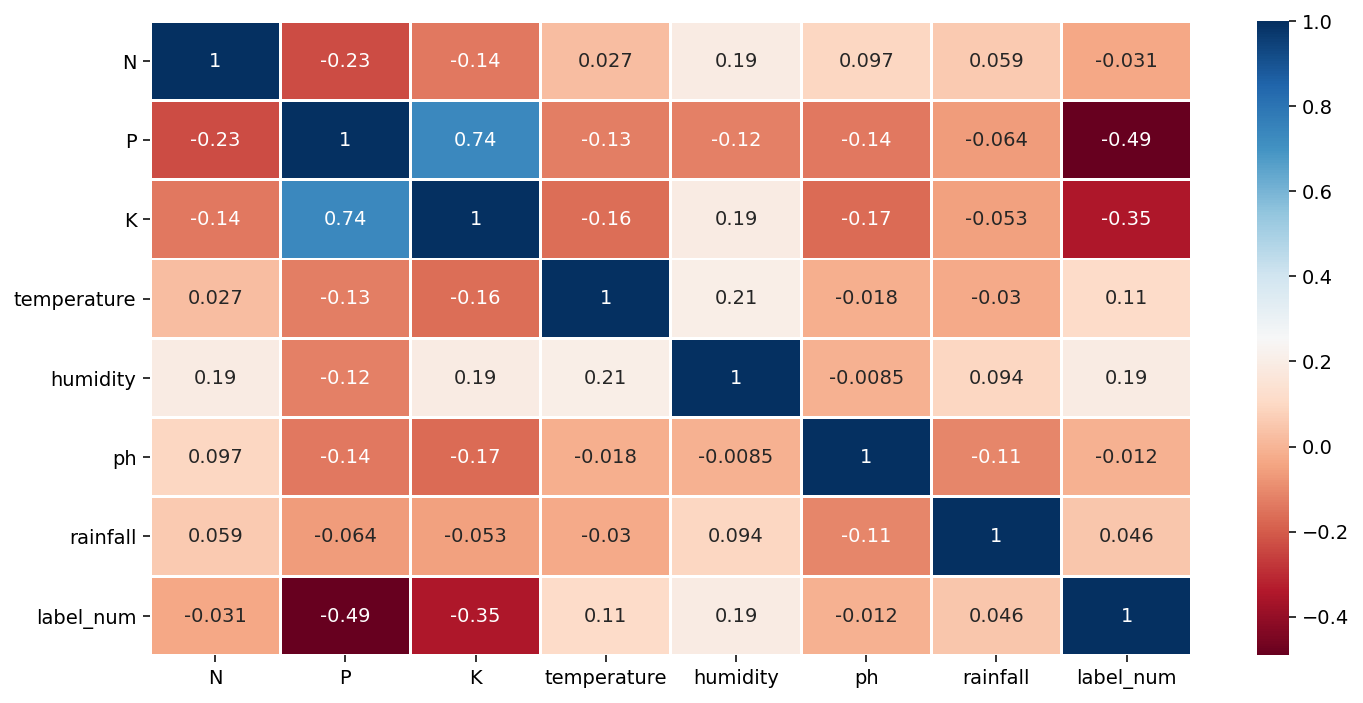

In [15]:
plt.figure(figsize=(12,6),dpi=140)
sns.heatmap(data.corr(),annot=True,cmap='RdBu',linewidths=1)
plt.show()

In [16]:
ac = np.array([i for i in range(22)])
a = encoder.inverse_transform(ac)
print(ac)
print(a)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
['apple' 'banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton'
 'grapes' 'jute' 'kidneybeans' 'lentil' 'maize' 'mango' 'mothbeans'
 'mungbean' 'muskmelon' 'orange' 'papaya' 'pigeonpeas' 'pomegranate'
 'rice' 'watermelon']


In [17]:
b = []
for i in a:
    b.append([i])
b = np.array(b)

In [18]:
col = pd.DataFrame(b,columns=['label'])

In [19]:
col

,label
0,apple
1,banana
2,blackgram
3,chickpea
4,coconut
5,coffee
6,cotton
7,grapes
8,jute
9,kidneybeans


In [20]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs,init_notebook_mode,iplot

In [21]:
init_notebook_mode(connected=True)

In [22]:
arr =[]
for i in data['ph']:
    if i>7:
        arr.append(1)
    else:
        arr.append(0)
arr = pd.DataFrame(arr,columns=['ph>7'])
data = pd.concat([data,arr],axis=1)
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label,label_num,ph>7
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20,1


In [23]:
fig = px.violin(data,x='label',y='P',color = 'ph>7',template = 'plotly_dark')
fig.update_layout(autosize=False,width=980,height=600,)
fig.show()

In [48]:
fig = px.violin(data,x='label',y='K',template = 'plotly_dark',)
fig.update_layout(autosize=False,width=980,height=600,)
fig.show()

In [25]:
fig = px.scatter(data,x='humidity',y='P',template = 'plotly_dark',hover_name='label')
fig.update_layout(autosize=False,width=980,height=600,)
fig.show()

In [26]:
fig = px.scatter(data,x='K',y='P',template = 'plotly_dark',hover_name='label')
fig.update_layout(autosize=False,width=980,height=600,)
fig.show()

In [27]:
fig = px.box(data,y='rainfall',template = 'plotly_dark',color='label')
fig.update_layout(autosize=False,width=980,height=600,)
fig.show()

In [28]:
fig = px.box(data,y='temperature',template = 'plotly_dark',color='label')
fig.update_layout(autosize=False,width=980,height=600,)
fig.show()

### Scale data

In [29]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label,label_num,ph>7
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20,1


In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()

In [32]:
scaledFeatures = scaler.fit_transform(data.drop(['label_num','ph>7','label'],axis=1))

In [33]:
scaledFeatures = pd.DataFrame(scaledFeatures,columns=data.columns[:-3])

In [34]:
scaledFeatures

,N,P,K,temperature,humidity,ph,rainfall
0,1.068797,-0.344551,-0.101688,-0.935587,0.472666,0.043302,1.810361
1,0.933329,0.140616,-0.141185,-0.759646,0.397051,0.734873,2.242058
2,0.255986,0.049647,-0.081939,-0.515898,0.486954,1.771510,2.921066
3,0.635298,-0.556811,-0.160933,0.172807,0.389805,0.660308,2.537048
4,0.743673,-0.344551,-0.121436,-1.083647,0.454792,1.497868,2.898373
...,...,...,...,...,...,...,...
2195,1.529390,-0.587134,-0.318922,0.228814,-0.227709,0.401395,1.352437
2196,1.312641,-1.163269,-0.417666,0.355720,-0.666947,-0.494413,0.445183
2197,1.827421,-0.617457,-0.358420,-0.293218,-0.191235,-0.138120,1.271418
2198,1.800327,-0.647780,-0.279425,0.129612,-0.869518,0.373904,0.431545


In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn = KNeighborsClassifier(n_neighbors=1)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(scaledFeatures,data['label'], test_size=0.30, random_state=101)

In [39]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [40]:
y_pred = knn.predict(X_test)

In [41]:
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        37
      banana       1.00      1.00      1.00        32
   blackgram       1.00      0.97      0.99        36
    chickpea       1.00      1.00      1.00        32
     coconut       1.00      1.00      1.00        23
      coffee       0.97      1.00      0.98        31
      cotton       0.91      1.00      0.95        29
      grapes       1.00      1.00      1.00        41
        jute       0.89      0.89      0.89        27
 kidneybeans       0.97      1.00      0.98        30
      lentil       0.91      1.00      0.95        29
       maize       1.00      0.91      0.95        34
       mango       1.00      1.00      1.00        33
   mothbeans       1.00      0.92      0.96        25
    mungbean       1.00      1.00      1.00        28
   muskmelon       1.00      1.00      1.00        26
      orange       1.00      1.00      1.00        29
      papaya       1.00    

In [43]:
#now finding the right amount of nearest neighbours
error_rate = []

for i in range(1,41):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_pred != y_test))

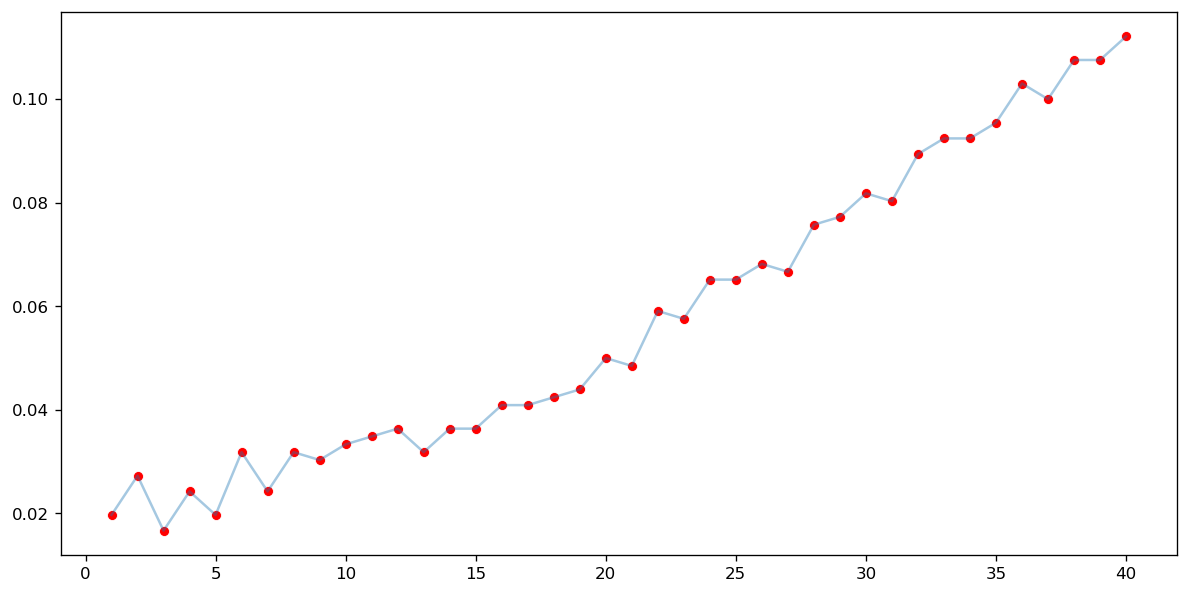

In [44]:
# now plotting the values to understand better
plt.figure(figsize=(12,6),dpi=120)
sns.lineplot(x=range(1,41),y=error_rate,alpha=0.4)
sns.scatterplot(x=range(1,41),y=error_rate,color='Red',alpha=1)
plt.show()

In [45]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        37
      banana       1.00      1.00      1.00        32
   blackgram       0.95      1.00      0.97        36
    chickpea       1.00      1.00      1.00        32
     coconut       1.00      1.00      1.00        23
      coffee       0.97      1.00      0.98        31
      cotton       0.91      1.00      0.95        29
      grapes       1.00      1.00      1.00        41
        jute       0.93      0.96      0.95        27
 kidneybeans       0.97      1.00      0.98        30
      lentil       0.93      0.97      0.95        29
       maize       1.00      0.91      0.95        34
       mango       1.00      1.00      1.00        33
   mothbeans       1.00      0.88      0.94        25
    mungbean       1.00      1.00      1.00        28
   muskmelon       1.00      1.00      1.00        26
      orange       1.00      1.00      1.00        29
      papaya       1.00    